In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

In [5]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))

In [6]:
with tf.Session() as sess:
    batch_size = 20
    
    my_output = tf.matmul(x_data, A)
    loss = tf.reduce_mean(tf.square(my_output - y_target))
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt = tf.train.GradientDescentOptimizer(0.02)
    train_step = my_opt.minimize(loss)
    
    loss_batch = []
    for i in range(100):
        rand_index = np.random.choice(100, size=batch_size)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        if (i + 1) % 5 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
            temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
            print('Loss = ' + str(temp_loss))
            loss_batch.append(temp_loss)

Step #5 A = [[1.2115939]]
Loss = 77.22889
Step #10 A = [[2.8110113]]
Loss = 52.332813
Step #15 A = [[4.1307445]]
Loss = 34.210762
Step #20 A = [[5.2062707]]
Loss = 24.316782
Step #25 A = [[6.0785446]]
Loss = 16.255737
Step #30 A = [[6.7798643]]
Loss = 10.19471
Step #35 A = [[7.3630233]]
Loss = 7.9291887
Step #40 A = [[7.82672]]
Loss = 4.396379
Step #45 A = [[8.191135]]
Loss = 3.0410092
Step #50 A = [[8.499724]]
Loss = 2.8611717
Step #55 A = [[8.760194]]
Loss = 2.5468059
Step #60 A = [[8.984958]]
Loss = 1.6887598
Step #65 A = [[9.1693]]
Loss = 2.2224822
Step #70 A = [[9.330034]]
Loss = 2.2250638
Step #75 A = [[9.44195]]
Loss = 1.3601869
Step #80 A = [[9.536871]]
Loss = 1.3373778
Step #85 A = [[9.572408]]
Loss = 1.1341621
Step #90 A = [[9.642732]]
Loss = 1.566212
Step #95 A = [[9.71733]]
Loss = 1.0241953
Step #100 A = [[9.729363]]
Loss = 1.1735897


In [9]:
with tf.Session() as sess:
    my_output = tf.matmul(x_data, A)
    loss = tf.reduce_mean(tf.square(my_output - y_target))
    init = tf.global_variables_initializer()
    sess.run(init)
    
    my_opt = tf.train.GradientDescentOptimizer(0.02)
    train_step = my_opt.minimize(loss)
    
    loss_stochastic = []
    for i in range(100):
        rand_index = np.random.choice(100)
        rand_x = [[x_vals[rand_index]]]
        rand_y = [[y_vals[rand_index]]]
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        
        if (i + 1) % 5 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
            temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
            print('Loss = ' + str(temp_loss))
            loss_stochastic.append(temp_loss)

Step #5 A = [[1.3100175]]
Loss = 74.537704
Step #10 A = [[2.9111288]]
Loss = 49.77268
Step #15 A = [[4.219282]]
Loss = 36.307713
Step #20 A = [[5.2640924]]
Loss = 24.709673
Step #25 A = [[6.141569]]
Loss = 16.526257
Step #30 A = [[6.803781]]
Loss = 8.800511
Step #35 A = [[7.392436]]
Loss = 5.5603585
Step #40 A = [[7.909409]]
Loss = 12.609991
Step #45 A = [[8.31452]]
Loss = 2.7007923
Step #50 A = [[8.573985]]
Loss = 3.4418938
Step #55 A = [[8.814038]]
Loss = 2.813644
Step #60 A = [[8.871798]]
Loss = 2.1362448
Step #65 A = [[9.006258]]
Loss = 0.5857714
Step #70 A = [[9.179193]]
Loss = 0.37097186
Step #75 A = [[9.395045]]
Loss = 5.4743824
Step #80 A = [[9.598371]]
Loss = 0.0014150183
Step #85 A = [[9.603069]]
Loss = 0.90671015
Step #90 A = [[9.737887]]
Loss = 0.35403326
Step #95 A = [[9.839732]]
Loss = 1.5434326
Step #100 A = [[9.879483]]
Loss = 1.6006072


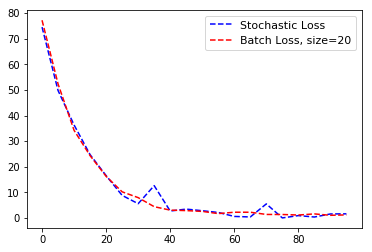

In [12]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b--', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()